In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#defining dataset with outliers
dataset=[11,10,12,14,12,12,15,14,13,15,102,12,14,17,19,10,13,12,14,12,108,12,11,14,13,15,10,14,13,15,10]

In [22]:
# finding Outliers using Z_score 
outliers=[]
def detect_outlier(data):
    threshold=3 #as 99.7% of data comes under 3 sd regions
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [23]:
print(detect_outlier(dataset))

[102, 108]


# finding Outlier using IQR
- sort the data
- calculate Q1 and Q3
- IQR(Q3-Q1)
- finding lower(Q1-1.5(IQR)) and upper fence(Q3+1.5(IQR))

In [24]:
dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 108]

In [25]:
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

12.0 14.5


In [26]:
# lower and higher fence
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5*iqr)

In [27]:
print(lower_fence,higher_fence)

8.25 18.25


In [30]:
outliers_iqr=[]
def detect_outlier_iqr(data):
    for i in data:
        if i<lower_fence or i>higher_fence:
            outliers_iqr.append(i)
    return outliers_iqr

In [31]:
detect_outlier_iqr(dataset)

[19, 102, 108]

so we got our outliers now we can see that on boxplot also as it is based on IQR(inter Quartile range) concept only

C:\Users\AKSHAT RAI LADDHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

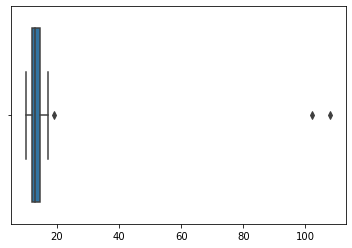

In [33]:
import seaborn as sns
sns.boxplot(dataset)

we can see outliers outside boxplot and we can remove them 